# PROBLEM STATEMENT for K-NN:

The given dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to 0 for healthy and 1 for PD.  Dataset can be downloaded from below link.

https://archive.ics.uci.edu/ml/datasets/parkinsons

Create classification model using KNN.  Identify the optimum no of neighbors and dimensions for your model.

Justify if KNN model should be considered or not for the problem statement.

evaluation will be based on..

1)  Handling of missing values, outliers, if any .

2)  Identifying data and model issues if any.

3) Choice of packages and distance measure used. justify your answer.

4) Selection of train, test split.

5) Final model creation and accuracy matrix selected for the model.

6) Future scope of the work.  

For any Queries on this question, Contact: mrath@wilp.bits-pilani.ac.in

Data is available in .data extension. 

 Importing required libraries

In [27]:
#Dependencies
import numpy as np
import pandas as pd
import os

Reading dataset

In [28]:
#dataset import
#to set up the current directory for input car dataset
#place parkindsons.data file under the same dir where this .ipynb file is placed.
__location__ = os.path.realpath(os.getcwd())
for dirname, _, filenames in os.walk(__location__):
    for filename in filenames:
        if filename == 'parkinsons.data':
            input_data = os.path.join(dirname, filename)
print(input_data)
dataset = pd.read_csv(input_data)
dataset.head(10) #Return 10 rows of data

C:\Users\sr20052253\Workspace\parkinsons.data


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [29]:
dataset.shape

(195, 24)

In [30]:
print('\n\nNull Cpount :\n',dataset.isnull().sum())



Null Cpount :
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [31]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Observation: There are no missing value or outliers.

In [32]:
dataset=dataset[['name','MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']]
dataset.shape

(195, 24)

In [33]:
my_y = pd.get_dummies(dataset.name, prefix='name')
my_y.head()
my_y.shape

(195, 195)

In [34]:
#Drop 'name', all name values has name  unqiue name, and no relattion wiht target
dataset=dataset.drop( columns='name')
dataset.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


### Q2:	Identifying data and model issues if any.
Observation for Question 2: <br>
Dropped the attribute “name” as it is not numeric, can not convert to 1 hot encoding as too many unique values and patient name do not have any effect of having any medical problem. So dropped the attribute “name:

In [35]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:22].values
y = dataset.iloc[:,-1].values

In [36]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Q3.	Choice of packages and distance measure used. justify your answer.
The distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance<br>
Packages used are <br>
a.	import numpy as np<br>
b.	import pandas as pd<br>
c.	from sklearn.preprocessing import StandardScaler <br>
d.	from sklearn.model_selection import train_test_split <br>
e.	from sklearn.neighbors import KNeighborsClassifier <br>
f.	from sklearn import metrics<br>
Distance measure options:<br>
a.	Euclidean distance, <br>
b.	Hamming distance, <br>
c.	Manhattan distance and <br> 
d.	Minkowski distance <br>


### Q4. Selection of train, test split.

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

### 3.1 Computing KNN Model for different values of K

In [38]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib

def find_k(met):
    import matplotlib.pyplot as plt
    acc = []
    for k in range(1,10):
        #Create KNN Classifier
        knn8 = KNeighborsClassifier(n_neighbors=k,metric=met)

        #Train the model using the training sets
        knn8.fit(X_train, y_train)

        #Predict the response for test dataset
        y_pred8 = knn8.predict(X_test)
        #Import scikit-learn metrics module for accuracy calculation

        # Model Accuracy, how often is the classifier correct?
        a = metrics.accuracy_score(y_test, y_pred8)
        acc.append(a)
        
    plt.plot( list(range(1,10)), acc)
    plt.ylabel('Accuracy score')
    plt.title(f'Distance Type = {met}')
    plt.show()

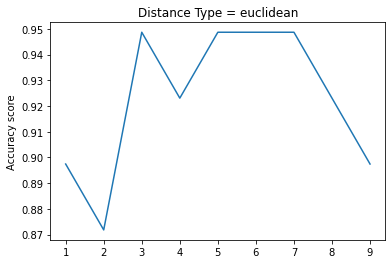

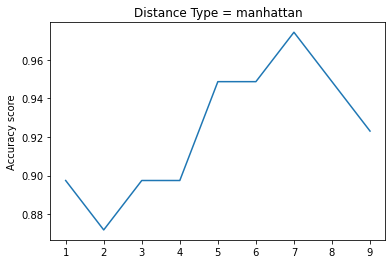

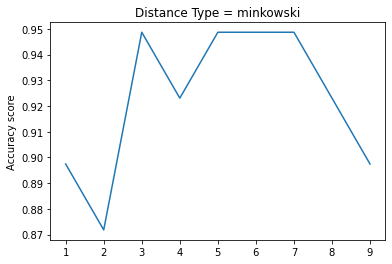

In [39]:
for met in ["euclidean", "manhattan", "minkowski"]:
    find_k(met)
    

### Q5.  Final model creation and accuracy matrix selected for the model.
We see that from the various graphs plotted for different metric like Manhattan, Euclidean and Minkowski, We will go with K value =5. We see at K=5 we have the maximum accuracy for Minkowski and Euclidean, and all the distance measure gives same accuracy at K=5.

### Q6. Future scope of the work. 
We can bulid multiple models like LogisticRegression, RandomForestClassifier, GradientBoostingClassifier etc., and evaluate these models to find the best performing models